In [1]:
import pandas as pd
import nltk
import typing
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read in data here
text_data = pd.read_excel('C:\\Users\\jackm\\Documents\\COVID-CrowdFight\\data\\200514 - Jack\\Translated-Cagliari.xlsx')
display(text_data.sample(5))

,Unnamed: 0,SearchKeywords,SearchCity,Time_Zone,tweet_ID,created_at,created_at_local,full_text,favorite_count,retweet_count,...,Geo,Coordinates,Checked_In_Place,User_Location,RT_id,RT_Geo,RT_Coordinates,RT_Place,RT_User_Location,translated_full_text
10548,10548,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Cagliari,1.0,1.240612e+18,2020-03-19 12:12:52,2020-03-19 13:12:52,#Coronavirus La prima laurea discussa in video...,3.0,1.0,...,NaN,NaN,None,Cagliari,None,None,None,None,None,#Coronavirus The first degree discussed in vid...
3510,3510,razzismo OR Codogno OR COVID19italia OR Lombar...,Cagliari,1.0,1.237165e+18,2020-03-09 23:53:37,2020-03-10 00:53:37,RT @cucchiaia: Con questa quarantena di un mes...,0.0,42.0,...,NaN,NaN,None,Beacon Hills,1237050898414779904,NaN,NaN,NaN,"Cagliari, Italy",RT @bug: With this quarantine of a month I cou...
3440,3440,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Cagliari,1.0,1.236930e+18,2020-03-09 08:20:05,2020-03-09 09:20:05,RT @cucchiaia: 7.300 casi totali di coronaviru...,0.0,394.0,...,NaN,NaN,None,Middle-earth,1236710624412950016,NaN,NaN,NaN,"Cagliari, Italy","RT @cucchiaia: 7,300 total cases of coronaviru..."
3712,3712,racism OR COVID-19 OR COVID2019 OR Lombardy OR...,Cagliari,1.0,1.237491e+18,2020-03-10 21:29:30,2020-03-10 22:29:30,"RT @UnicaRadio: ‚ÄúL‚ÄôItalia chiam√≤‚Äù, la m...",0.0,1.0,...,NaN,NaN,None,roma,1237437318656649984,NaN,NaN,NaN,Cagliari,"RT @UnicaRadio: 'ÄúL'ÄôItalia chiam√≤'Äù, the ..."
14309,14309,razzismo OR Codogno OR COVID19italia OR Lombar...,Cagliari,1.0,1.242873e+18,2020-03-25 17:57:33,2020-03-25 18:57:33,RT @cucchiaia: Io non ci voglio credere che la...,0.0,11.0,...,NaN,NaN,None,I hope at a concert,1242870825365260032,NaN,NaN,NaN,"Cagliari, Italy",RT @sucker: I do not want to believe that peop...


In [3]:
# Import english stop words

from nltk.corpus import stopwords
stopcorpus: typing.List = stopwords.words('english')
print(stopcorpus)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
# Convert to lowercase, and remove stop words

def style_text(text:str):
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    return [item for item in text_data if item not in list_of_words_to_remove]

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(style_text)

text_data['cleaned_text'] = text_data['translated_full_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

def collapse_list_to_string(string_list):
    return ' '.join(string_list)

text_data['cleaned_text'] = text_data['cleaned_text'].apply(collapse_list_to_string)

display(text_data['cleaned_text'].head(5))

0    RT @MichelaMeloni1: First case Coronavirus Cag...
1    RT @succhiaia: You would saved us Coronavirus:...
2    RT @succhiaia: You would saved us Coronavirus:...
3    RT @succhiaia: You would saved us Coronavirus:...
4    RT @succhiaia: You would saved us Coronavirus:...
Name: cleaned_text, dtype: object

In [5]:
# Lemmatize cleaned text (stem words)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

text_data['clean_lemmatized'] = text_data['cleaned_text'].astype(str).apply(lemmatize_text)

text_data['clean_lemmatized'] = text_data['clean_lemmatized'].apply(collapse_list_to_string)

display(text_data['clean_lemmatized'].head(5))

0    RT @MichelaMeloni1: First case Coronavirus Cag...
1    RT @succhiaia: You would saved u Coronavirus: ...
2    RT @succhiaia: You would saved u Coronavirus: ...
3    RT @succhiaia: You would saved u Coronavirus: ...
4    RT @succhiaia: You would saved u Coronavirus: ...
Name: clean_lemmatized, dtype: object

In [6]:
output_df = pd.DataFrame(text_data[['clean_lemmatized','full_text']].drop_duplicates())
display(output_df.head(5))

,clean_lemmatized,full_text
0,RT @MichelaMeloni1: First case Coronavirus Cag...,RT @MichelaMeloni1: Primo caso di Coronavirus ...
1,RT @succhiaia: You would saved u Coronavirus: ...,RT @cucchiaia: Lei ci avrebbe salvati dal Coro...
27,RT @MichelaMeloni1: First case Coronavirus Cag...,RT @MichelaMeloni1: Primo caso di Coronavirus ...
51,@scorpiondag The Coronavirus show precarious l...,@scorpiondag Il Coronavirus dimostra quanto la...
66,"RT @sardanews: Coronavirus effect, Ryanair red...","RT @sardanews: Effetto Coronavirus, Ryanair ri..."


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

In [8]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

In [9]:
# Get Sentiment scores
output_df['Positive Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
output_df['Negative Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
output_df['Neutral Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
output_df['Compound Sentiment Score'] = output_df['clean_lemmatized'].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))

display(output_df.head(5))

,clean_lemmatized,full_text,Positive Sentiment Score,Negative Sentiment Score,Neutral Sentiment Score,Compound Sentiment Score
0,RT @MichelaMeloni1: First case Coronavirus Cag...,RT @MichelaMeloni1: Primo caso di Coronavirus ...,0.000,0.0,1.000,0.0000
1,RT @succhiaia: You would saved u Coronavirus: ...,RT @cucchiaia: Lei ci avrebbe salvati dal Coro...,0.286,0.0,0.714,0.4215
27,RT @MichelaMeloni1: First case Coronavirus Cag...,RT @MichelaMeloni1: Primo caso di Coronavirus ...,0.000,0.0,1.000,0.0000
51,@scorpiondag The Coronavirus show precarious l...,@scorpiondag Il Coronavirus dimostra quanto la...,0.214,0.0,0.786,0.7184
66,"RT @sardanews: Coronavirus effect, Ryanair red...","RT @sardanews: Effetto Coronavirus, Ryanair ri...",0.000,0.0,1.000,0.0000


In [10]:
output_df.to_excel('Cagliari-Sentiment.xlsx')

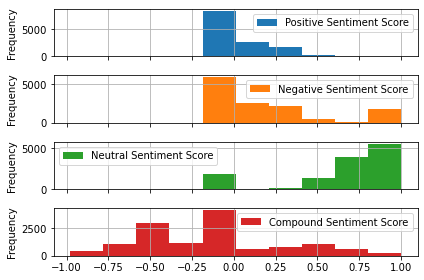

In [13]:
output_df.plot.hist(subplots=True,grid=True)
plt.tight_layout()
plt.savefig('Cagliari-sentiment-histograms.jpg')

(-0.5, 399.5, 199.5, -0.5)

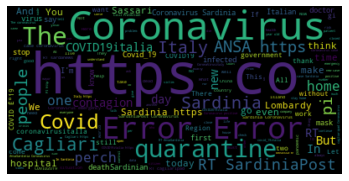

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(output_df['clean_lemmatized']))

plt.imshow(wordcloud, interpolation='bilinear')

plt.imsave('Cagliari-clean-wordcloud.jpg',wordcloud)
plt.axis("off")